<a href="https://colab.research.google.com/github/Muthon1/DataScience/blob/main/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Checkpoint Assignments/Credit_card_dataset.csv')

In [5]:
df. head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [7]:
df. describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [8]:
#Missing values
df.isnull().sum()

,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [9]:
# Replacing missing values with the mean of numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [10]:
# Select numerical columns
numerical_columns = ["BALANCE_FREQUENCY", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]

# Normalize the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Preview the normalized data
df_normalized.head()


,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,0.001945,0.003979,0.031720,0.000000
1,C10002,0.909091,0.000000,0.080893,0.232053,0.136685
2,C10003,1.000000,0.015766,0.012264,0.248748,0.000000
3,C10004,0.636364,0.030567,0.000000,0.248748,0.004366
4,C10005,1.000000,0.000326,0.013374,0.038397,0.000000


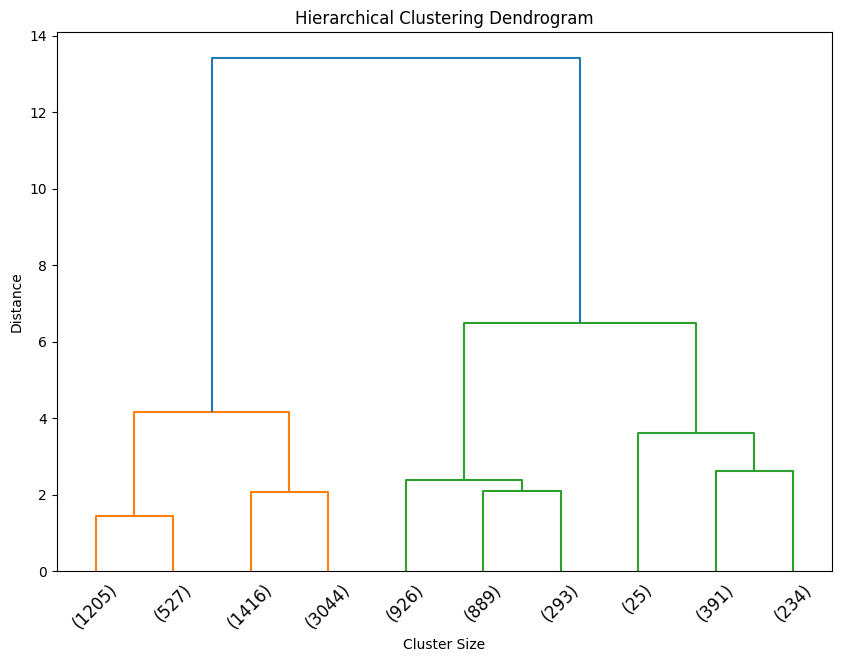

In [11]:
# Perform hierarchical clustering to identify the inherent groupings within your data
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Use 'PURCHASES' and 'CREDIT_LIMIT' for clustering
features = df_normalized[["PURCHASES", "CREDIT_LIMIT"]]

# Perform hierarchical clustering
linked = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


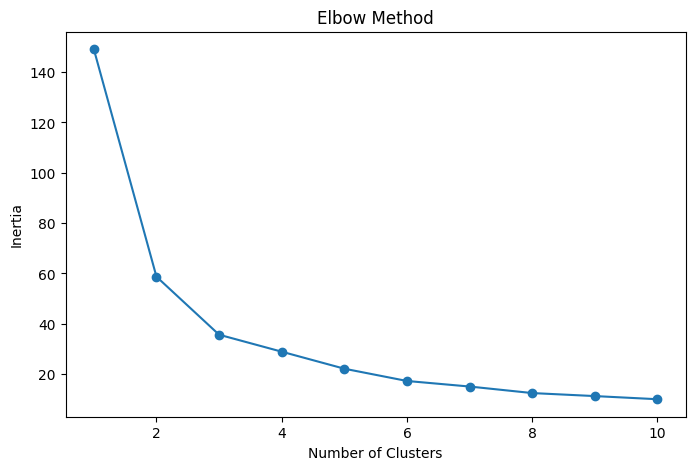

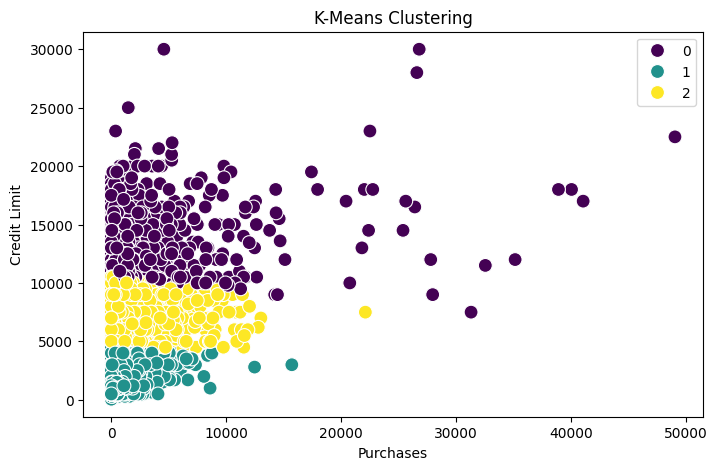

In [12]:
# Perform partitional clustering using the K-means algorithm. Then, plot the clusters
from sklearn.cluster import KMeans

# Use 'PURCHASES' and 'CREDIT_LIMIT' for clustering
kmeans_features = df_normalized[["PURCHASES", "CREDIT_LIMIT"]]

# Determine the best number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(kmeans_features)

# Add cluster labels to the data
df["Cluster"] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="PURCHASES", y="CREDIT_LIMIT", hue="Cluster", data=df, palette="viridis", s=100
)
plt.title("K-Means Clustering")
plt.xlabel("Purchases")
plt.ylabel("Credit Limit")
plt.legend()
plt.show()


In [13]:
# Summarize the clusters
cluster_summary = df.groupby("Cluster")[["PURCHASES", "CREDIT_LIMIT", "CASH_ADVANCE", "PAYMENTS"]].mean()
print(cluster_summary)


           PURCHASES  CREDIT_LIMIT  CASH_ADVANCE     PAYMENTS
Cluster                                                      
0        3372.899881  13507.228018   2304.315956  5123.355002
1         575.092436   2237.201292    549.590482  1037.141924
2        1311.999359   7003.484506   1554.357016  2352.137506
